# Coupled Lorenz '96 model

Here we describe the form of the Lorenz96 model utilized by Edward Lorenz in his 1996 paper. 

The model consists of $K$ 'slow' variables representing the resolved state variables, each of which is coupled to $J$ 'fast' variables - representing the unresolved sub-grid processes.

$$ \frac{dX_{k}}{dt} =  -X_{k-1}(X_{k-2}-X_{k+1}) - X_{k} +F - hc \overline{Y}_{k}$$

for $k = 1,2,...,K$

$$\frac{1}{c} \frac{dY_{j,k}}{dt} = -bY_{j+1,k}\,(Y_{j+2, k}-Y_{j-1, k}) - Y_{j,k} +\frac{h}{J} X_{k}$$

for $j = 1, 2, ..., J$. The overbar denotes the mean value over $J$:

$$ \overline{Y_{k}} = \frac{1}{J} \Sigma^{J}_{j =1} Y_{j,k}$$

the resolved and unresolved variables form a cyclic chain:

$$ \boxed{X_{k+K} = X_{k}, \, \, Y_{j, k+K} = Y_{j,k}, \, \, Y_{j+J, k} = Y_{j, k+1} }$$


Finally, to solve this system of equations, we must also prescribe initial conditions for all $X_{k}$ and $Y_{j,k}$.

N.B.


$$Y_{j+J, k}   = Y_{j, k+1}$$
let $i = j+J$, then relabel $i =>j$
$$Y_{j, k}   = Y_{j-J, k+1}$$

$$Y_{-1, k}    = Y_{J-1, k-1}$$ 

$$Y_{(J-2)+1, k} = Y_{J-1, k}$$
$$Y_{(J-2)+2, k} = Y_{0, k+1}$$

$$Y_{(J-1)+1, k} = Y_{0, k+1}$$
$$Y_{(J-1)+2, k} = Y_{1, k+1}$$

## Runge-Kutta Method for finite-differences

To solve finite-difference equations there are numerous different methods, the one which I will elaborate on in this notebook is the **4th-order Runge-Kutta method** or simply 'RK4'.

We will explain the method by reference to a simple toy problem.

Let an initial-value problem be specified as follows:

$$ \boxed{ \frac{dy}{dt} = f(t,y) \, , \, \, y(t_{0}) = y_{0} } $$

Pick a step size $h>0$ and define:

$$ y_{n+1} = y_{n} + \frac{1}{6}(k_{1}+2k_{2}+2k_{3}+k_{4}) $$
$$ t_{n+1} = t_{n} + h $$

for $n = 0, 1, 2,3, ...$ using:

$$ k_{1} = h \, f(t_{n}, y_{n}) $$
$$ k_{2} = h \, f\bigg(t_{n} + \frac{h}{2}, y_{n} + \frac{k_{1}}{2} \bigg) $$
$$ k_{3} = h \, f\bigg(t_{n} + \frac{h}{2}, y_{n} + \frac{k_{2}}{2} \bigg) $$
$$ k_{4} = h \, f\bigg(t_{n} + h, y_{n} + k_{3}\bigg) $$

1000
2000
3000
4000


<Figure size 432x288 with 0 Axes>

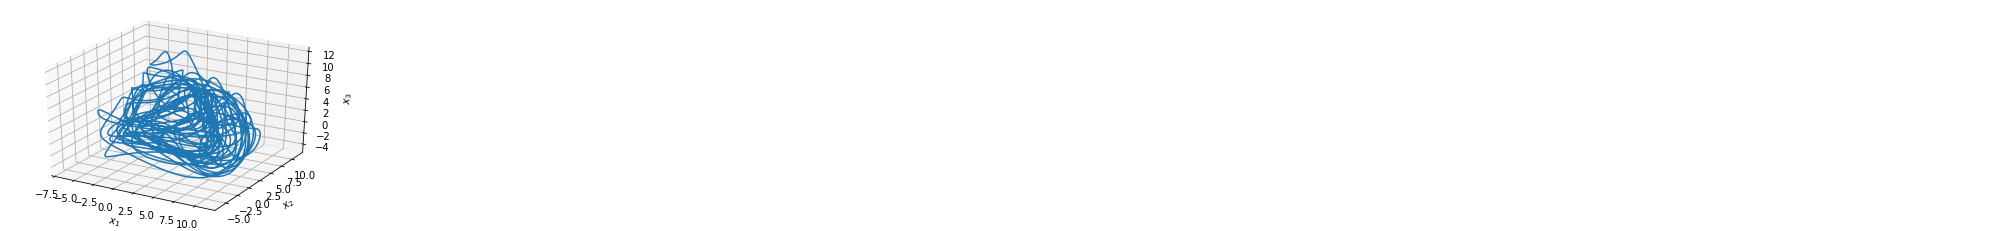

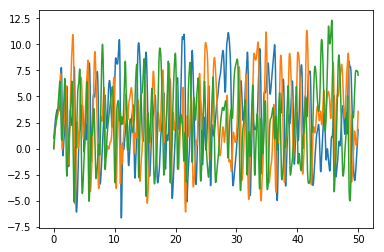

In [62]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def Lorenz96(X, Y, h, F, b, c):
    """
    Calculate the time increment in the X and Y variables for the Lorenz '96 "truth" model.
    Args:
        X (1D ndarray): Values of X variables at the current time step
        Y (1D ndarray): Values of Y variables at the current time step
        h (float): Coupling constant
        F (float): Forcing term
        b (float): Spatial scale ratio
        c (float): Time scale ratio
    Returns:
        dXdt (1D ndarray): Array of X increments, dYdt (1D ndarray): Array of Y increments
    """
    K = X.size
    J = Y.size // K
    dXdt = np.zeros(X.shape)
    dYdt = np.zeros(Y.shape)
    for k in range(K):
        dXdt[k] = -X[k - 1] * (X[k - 2] - X[(k + 1) % K]) - X[k] + F - h * c / J * np.sum(Y[k * J: (k + 1) * J])
    for j in range(J * K):
        dYdt[j] = -c * b * Y[(j + 1) % (J * K)] * (Y[(j + 2) % (J * K)] - Y[j-1]) - c * Y[j] + h * c / b * X[int(j / J)]
    return dXdt, dYdt

def RK4(x0, y0, dt, nt, h, F, b, c):
    """
    4th-order Runge-Kutta method for solving discretized Lorenz '96 "truth" model.
    Args:
        x0: 1D array of length K of input values for X
        y0: 1D array of length J*K of input values for Y
        dt: timestep
        nt: number of timesteps to take
        h: Coupling constant.
        f: Forcing term.
        b: Spatial scale ratio
        c: Time scale ratio
    Returns:
        
    """
    steps = np.arange(nt)
    times = dt * steps
    
    x_out = np.zeros((nt, x0.size))
    y_out = np.zeros((nt, y0.size))
    
    x = x0.copy()
    y = y0.copy()
    
    x_out[0] = x
    y_out[0] = y
    
    # initialize empty arrays for RK4 procedure
    k1_dxdt = np.zeros(x.shape)
    k2_dxdt = np.zeros(x.shape)
    k3_dxdt = np.zeros(x.shape)
    k4_dxdt = np.zeros(x.shape)
    
    k1_dydt = np.zeros(y.shape)
    k2_dydt = np.zeros(y.shape)
    k3_dydt = np.zeros(y.shape)
    k4_dydt = np.zeros(y.shape)
    
    for i in range(1, nt):
        if i%1000 == 0:
            print(i)
        k1_dxdt[:], k1_dydt[:] = Lorenz96(x, y, h, F, b, c)
        
        k2_dxdt[:], k2_dydt[:] = Lorenz96(x + k1_dxdt * dt / 2,
                                                y + k1_dydt * dt / 2,
                                                h, F, b, c)
        
        k3_dxdt[:], k3_dydt[:] = Lorenz96(x + k2_dxdt * dt / 2,
                                                y + k2_dydt * dt / 2,
                                                h, F, b, c)
        
        k4_dxdt[:], k4_dydt[:] = Lorenz96(x + k3_dxdt * dt,
                                                y + k3_dydt * dt,
                                                h, F, b, c)
        
        x += (k1_dxdt + 2 * k2_dxdt + 2 * k3_dxdt + k4_dxdt) / 6 * dt
        y += (k1_dydt + 2 * k2_dydt + 2 * k3_dydt + k4_dydt) / 6 * dt
        
        x_out[i] = x
        y_out[i] = y
        
    return x_out, y_out, times
        


def main():
    # constants
    K = 36
    J = 10
    h = 1
    F = 10 # forcing
    c = 10
    b = 10
    
    # initial conditions
    x0 = np.zeros(K)
    y0 = np.zeros(J * K)
    x0[0] = 1
    y0[0] = 1
    
    dt = 0.01
    nt = 5000
    
    X_out, Y_out, times = RK4(x0, y0, dt, nt, h, F, b, c)
    
    # plot attractor
    from mpl_toolkits.mplot3d import Axes3D
    plt.figure()
    ax = plt.figure().gca(projection='3d')
    ax.plot(X_out[:,0],X_out[:,1],X_out[:,2])
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$x_3$')
    
    # plot timeseries'
    plt.figure()
    plt.plot(times, X_out[:,0])
    plt.plot(times, X_out[:,1])
    plt.plot(times, X_out[:,2])
    
    return

if __name__ == "__main__":
    main()